In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
train=pd.read_csv(r"C:\Users\prave\datasets\csv files\Hackathons\Forecast green energy\train_IxoE5JN.csv",parse_dates=['datetime'])


test=pd.read_csv(r"C:\Users\prave\datasets\csv files\Hackathons\Forecast green energy\test_WudNWDM.csv",parse_dates=['datetime'])

sub=pd.read_csv(r"C:\Users\prave\datasets\csv files\Hackathons\Forecast green energy\sample_submission_jn0a7vR.csv")

In [3]:
train.tail(30)

,row_id,datetime,energy
94962,94963,2018-12-30 18:00:00,2414.6892
94963,94964,2018-12-30 19:00:00,2364.2212
94964,94965,2018-12-30 20:00:00,2285.9276
94965,94966,2018-12-30 21:00:00,2180.8996
94966,94967,2018-12-30 22:00:00,2134.6600
94967,94968,2018-12-30 23:00:00,1998.5328
94968,94969,2018-12-31 00:00:00,1827.8964
94969,94970,2018-12-31 01:00:00,1713.0476
94970,94971,2018-12-31 02:00:00,1619.6136
94971,94972,2018-12-31 03:00:00,1555.6420


In [4]:
# check any missing values
train.isnull().sum()

row_id         0
datetime       0
energy      1900
dtype: int64

<AxesSubplot:xlabel='energy', ylabel='Density'>

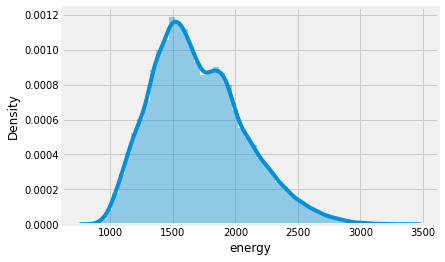

In [5]:
sns.distplot(train['energy'])

**Note:** since energy feature follows **Gaussian normal distribution** so nan values are replaced with mean distribution

In [6]:
# imputing nan values
train['energy']=train['energy'].fillna(train['energy'].mean())

In [7]:
train['dateandtime']=pd.to_datetime(train['datetime'])
test['dateandtime']=pd.to_datetime(test['datetime'])

train['year']=train['dateandtime'].dt.year
train['month']=train['dateandtime'].dt.month
train['day']=train['dateandtime'].dt.day
train['hour']=train['dateandtime'].dt.hour

test['year']=test['dateandtime'].dt.year
test['month']=test['dateandtime'].dt.month
test['day']=test['dateandtime'].dt.day
test['hour']=test['dateandtime'].dt.hour

In [8]:
train.drop(['datetime','dateandtime'],axis=1,inplace=True)
test.drop(['datetime','dateandtime'],axis=1,inplace=True)

In [9]:
X_train=train.drop('energy',axis=1)
y_train=train['energy']
X_test=test

In [10]:
from lightgbm import LGBMRegressor

**LGBM**

In [11]:
# model=LGBMRegressor(boosting_type='gbdt',class_weight=None,importance_type='split',learning_rate=0.83,max_depth=9,
                   # random_state=None,reg_alpha=0.92,reg_lambda=0.92,silent=True)

In [12]:
# model.fit(X_train,y_train,eval_metric='rmse')

LGBMRegressor(learning_rate=0.83, max_depth=9, reg_alpha=0.92, reg_lambda=0.92)

In [13]:
# pred=model.predict(X_test)

In [14]:
# sub['energy']=pred

**LSTM**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dense, Reshape, Dropout, LSTM, RepeatVector, TimeDistributed

ModuleNotFoundError: No module named 'absl'

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1,X_train.shape[1],1)))
model.add(Dense (10, activation='relu'))
model.add(Dense (1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam',
               metrics=['mse'])
model.summary()